In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv")
df = df.drop("Student_ID",axis = 1)
label_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']

for col in label_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

X = df.drop("Mental_Health_Score",axis=1)
y = df["Mental_Health_Score"]

#Train-test Split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [5]:
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

print("RMSE:",rmse)
print("\n R2:",r2)

RMSE: 0.24080070947959611

 R2: 0.9517010450363159


<Figure size 1200x600 with 0 Axes>

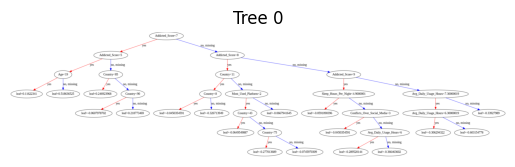

<Figure size 1200x600 with 0 Axes>

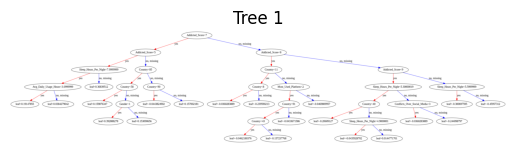

<Figure size 1200x600 with 0 Axes>

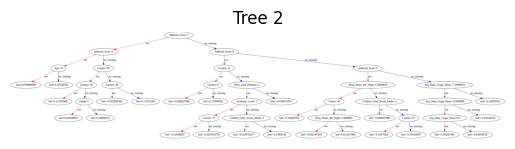

In [11]:
# Plot first 3 trees
for i in range(3):
    plt.figure(figsize=(12, 6))
    xgb.plot_tree(model, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()


In [12]:
# Save model
joblib.dump(model, "xgboost_mental_health_model.pkl")
print("Model saved as xgboost_mental_health_model.pkl")


Model saved as xgboost_mental_health_model.pkl
